In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from copy import deepcopy
import pandas as pd
import seaborn as sns
sns.set()
plt.rcParams['figure.figsize'] = (16,9)
plt.style.use('ggplot')

# importing the dataset
data = pd.read_csv('movie_metadata.csv')
print(data.head)
print(data.shape)

<bound method NDFrame.head of       color      director_name  num_critic_for_reviews  duration  \
0     Color      James Cameron                   723.0     178.0   
1     Color     Gore Verbinski                   302.0     169.0   
2     Color         Sam Mendes                   602.0     148.0   
3     Color  Christopher Nolan                   813.0     164.0   
4       NaN        Doug Walker                     NaN       NaN   
...     ...                ...                     ...       ...   
5038  Color        Scott Smith                     1.0      87.0   
5039  Color                NaN                    43.0      43.0   
5040  Color   Benjamin Roberds                    13.0      76.0   
5041  Color        Daniel Hsia                    14.0     100.0   
5042  Color           Jon Gunn                    43.0      90.0   

      director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                         0.0                   855.0  Joel David Moore   
1  

In [4]:
data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [23]:
data['director_facebook_likes']

0           0.0
1         563.0
2           0.0
3       22000.0
4         131.0
         ...   
5038        2.0
5039        NaN
5040        0.0
5041        0.0
5042       16.0
Name: director_facebook_likes, Length: 5043, dtype: float64

In [24]:
newdata = data.iloc[:,4:6]
newdata = newdata.dropna(inplace = False)
print(newdata)

      director_facebook_likes  actor_3_facebook_likes
0                         0.0                   855.0
1                       563.0                  1000.0
2                         0.0                   161.0
3                     22000.0                 23000.0
5                       475.0                   530.0
...                       ...                     ...
5037                      0.0                   133.0
5038                      2.0                   318.0
5040                      0.0                     0.0
5041                      0.0                   489.0
5042                     16.0                    16.0

[4919 rows x 2 columns]


In [12]:
# using kmeans 
from sklearn.cluster import KMeans

In [14]:
kmeans = KMeans(n_clusters = 5)

In [25]:
kmeans.fit(newdata)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [28]:
kmeans.cluster_centers_

array([[  153.94452806,   424.19264674],
       [12490.38461538,   605.93269231],
       [  210.77011494, 11126.43678161],
       [17621.21212121,   596.10606061],
       [17545.45454545, 14545.45454545]])

In [30]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0])

C:\Users\Musingila\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


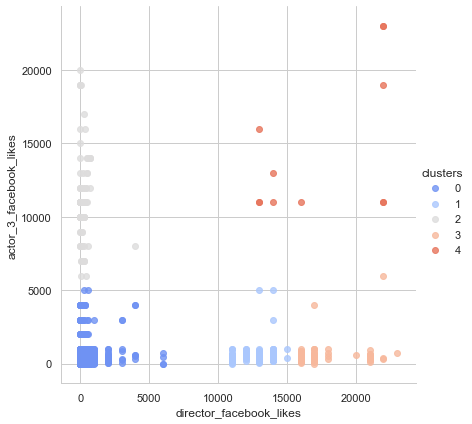

In [33]:
newdata['clusters'] = kmeans.labels_
sns.set_style('whitegrid')
sns.lmplot('director_facebook_likes','actor_3_facebook_likes' ,data = newdata,
           hue = 'clusters',palette = 'coolwarm',size = 6, aspect = 1, fit_reg = False)